In [222]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
mm = MinMaxScaler()

In [223]:
PATH = ('/Users/inseongkim/PycharmProjects/ML_class/proj_stud/student_score.csv')

In [224]:
study = pd.read_csv(PATH)
stu = study.copy()

In [225]:
stu.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

In [226]:
stu.isna().sum()
stu

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


#NaN데이터 처리

In [227]:
stu.TransportMeans=stu.TransportMeans.fillna('foot')
stu.TestPrep = stu.TestPrep.fillna('none')
stu.WklyStudyHours = stu.WklyStudyHours.fillna('0')
stu['IsFirstChild'] = stu['IsFirstChild'].fillna('no')
stu.PracticeSport = stu.PracticeSport.fillna('no')
stu.NrSiblings = stu.NrSiblings.fillna(0.0)
stu.ParentMaritalStatus = stu.ParentMaritalStatus.fillna('single')
stu.ParentEduc = stu.ParentEduc.fillna('some high school')
stu.replace('high school','some high school')
stu.EthnicGroup = stu.EthnicGroup.fillna('group A')


stu

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group A,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,none,married,sometimes,yes,0.0,foot,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,foot,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,group A,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


0과 1로 변환

In [205]:
stu.drop(['TestPrep','LunchType','NrSiblings','TransportMeans','Unnamed: 0'],axis=1,inplace=True)
stu.replace(
    {'EthnicGroup':
     {
      'group A':0,
      'group B':1,
      'group C':2,
      'group D':3,
      'group E':4
      },
      'IsFirstChild':
      {
        'yes':0,
        'no':1
      },
      'PracticeSport':
      {
        'never':0,
        'sometimes':1,
        'regularly':2,
        'no':3
      },
      'ParentMaritalStatus':
      {
        'single':0,
        'widowed':1,
        'married':2,
        'divorced':3
      },
      'ParentEduc':
      {
        'some high school':0,
        'high school':0,
        'some college':1,
        "bachelor's degree":2,
        "associate's degree":3,
        "master's degree":4
      },
      'WklyStudyHours':
      {
        '< 5':1,
        '5 - 10':2,
        '> 10':3
      },
      'Gender':
      {
        'female':0,
        'male':1
      }
      },
            inplace=True)

In [206]:
stu

,Gender,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,2,2,2,0,1,71,71,74
1,0,2,1,2,1,0,2,69,90,88
2,0,1,4,0,1,0,1,87,93,91
3,1,0,3,2,0,1,2,45,56,42
4,1,2,1,2,1,0,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...
30636,0,3,0,0,1,1,2,59,61,65
30637,1,4,0,0,2,1,2,58,53,51
30638,0,0,0,2,1,1,2,61,70,67
30639,0,3,3,2,2,1,2,82,90,93


In [208]:
stu['TotalMeans'] = (stu['MathScore'].astype('int')+stu['ReadingScore'].astype('int')+stu['WritingScore'].astype('int'))/3


<Axes: >

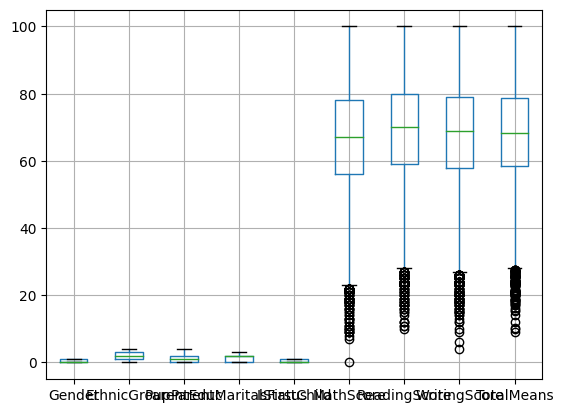

In [209]:
import matplotlib.pyplot as plt
stu.boxplot()

In [210]:
y = stu.pop('TotalMeans')
X = stu

In [211]:
stu

,Gender,EthnicGroup,ParentEduc,ParentMaritalStatus,PracticeSport,IsFirstChild,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,0,2,2,2,0,1,71,71,74
1,0,2,1,2,1,0,2,69,90,88
2,0,1,4,0,1,0,1,87,93,91
3,1,0,3,2,0,1,2,45,56,42
4,1,2,1,2,1,0,2,76,78,75
...,...,...,...,...,...,...,...,...,...,...
30636,0,3,0,0,1,1,2,59,61,65
30637,1,4,0,0,2,1,2,58,53,51
30638,0,0,0,2,1,1,2,61,70,67
30639,0,3,3,2,2,1,2,82,90,93


In [212]:
X = mm.fit_transform(X)

ValueError: could not convert string to float: 'no'

In [229]:
stu[['WklyStudyHours']].value_counts()

WklyStudyHours
5 - 10            16246
< 5                8238
> 10               5202
0                   955
Name: count, dtype: int64